SUPPORT VECTOR MACHINE

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks.SVM is particularly well-suited for classification tasks. 
The key idea behind the SVM algorithm is to find the hyperplane that best separates two classes by maximizing the margin between them.Margin is the distance between the hyperplane and the support vectors. SVM aims to maximize this margin for better classification performance

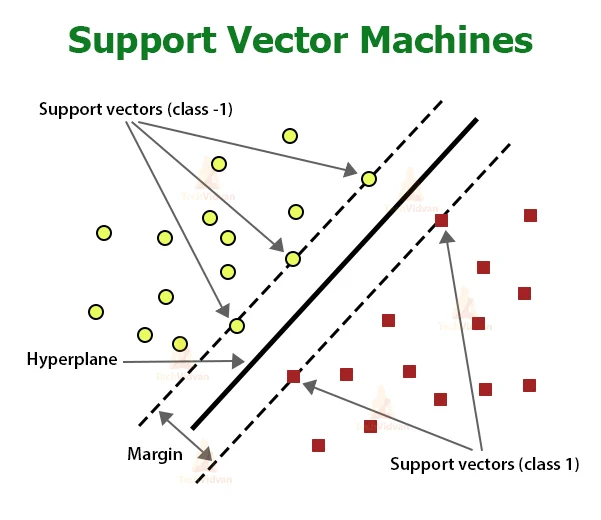

# IMPORT LIBRARIES

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, roc_curve
)
from imblearn.metrics import geometric_mean_score  # For G-Mean

# LOAD DATASET

In [16]:
# Load the dataset
df = pd.read_csv("/kaggle/input/weather-australia/weatherAUS.csv")


# DATA PREPROCESSING

In [17]:

df_numeric = df.select_dtypes(include=[np.number]).dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)



# APPLY PCA

In [18]:

pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

# APPLY K-MEANS CLUSTERING

In [19]:

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_numeric["Cluster"] = kmeans.fit_predict(pca_data)


In [20]:

X = df_numeric.drop(columns=["Cluster"])
y = df_numeric["Cluster"]


# TRAIN & TEST SPLIT

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# TRAIN SVM

In [22]:
# Step 5: Train SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [23]:
# Step 6: Predictions & Performance Metrics
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)  # Get probability scores for ROC curve


# EVALUATING SVM  BEFORE FEATURE SELECTION

SVM Accuracy: 0.9166
Precision: 0.9167
Recall: 0.9166
F1-Score: 0.9157
G-Mean: 0.9360
ROC-AUC Score: 0.9885


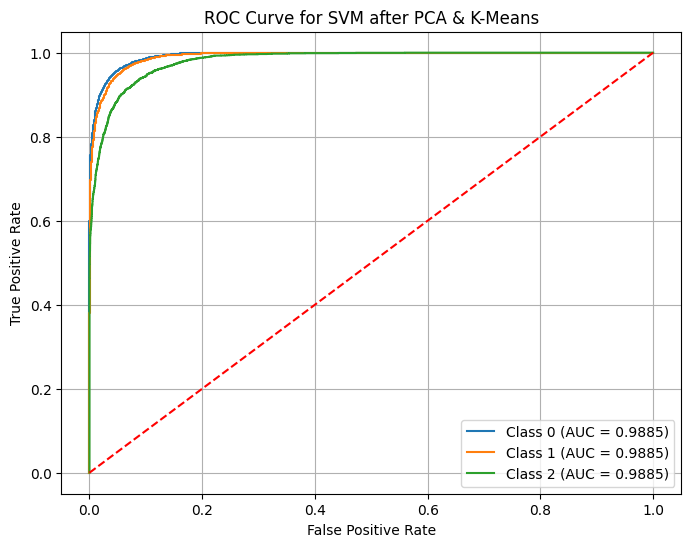

In [24]:
# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
g_mean = geometric_mean_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

# Print Metrics
print(f"SVM Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"G-Mean: {g_mean:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 7: Plot ROC Curve
fpr = {}
tpr = {}
for i in range(len(np.unique(y_test))):  # Multi-class ROC
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])

plt.figure(figsize=(8, 6))
for i in fpr:
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM after PCA & K-Means")
plt.legend()
plt.grid()
plt.show()

# SVM AFTER FEATURE SELECTION

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, roc_curve
)
from imblearn.metrics import geometric_mean_score  # For G-Mean
from sklearn.feature_selection import SelectKBest, mutual_info_classif  # Import SelectKBest


In [32]:
# Step 1: Data Preprocessing
df_numeric = df.select_dtypes(include=[np.number]).dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)


In [33]:
# Step 2: Apply PCA (Keep 95% variance)
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)


In [34]:
# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_numeric["Cluster"] = kmeans.fit_predict(pca_data)


In [35]:
# Step 4: Prepare dataset for SVM
X = df_numeric.drop(columns=["Cluster"])
y = df_numeric["Cluster"]


# FEATURE SELECTION USING SELECTKBEST

In [36]:
# Step 5: Feature Selection using SelectKBest (Mutual Information)
k = 10  # Select top 10 most relevant features
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print(f"Top {k} selected features: {selected_features.tolist()}")


Top 10 selected features: ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [37]:
# Train-test split (Use X_selected for feature selection)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [38]:
# Step 6: Train SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [39]:
# Step 7: Predictions & Performance Metrics
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)  # Get probability scores for ROC curve


# SVM EVALUATION METRICS AFTER FEATURE SELECTION

SVM Accuracy after Feature Selection: 0.8590
Precision: 0.8575
Recall: 0.8590
F1-Score: 0.8562
G-Mean: 0.8924
ROC-AUC Score: 0.9660


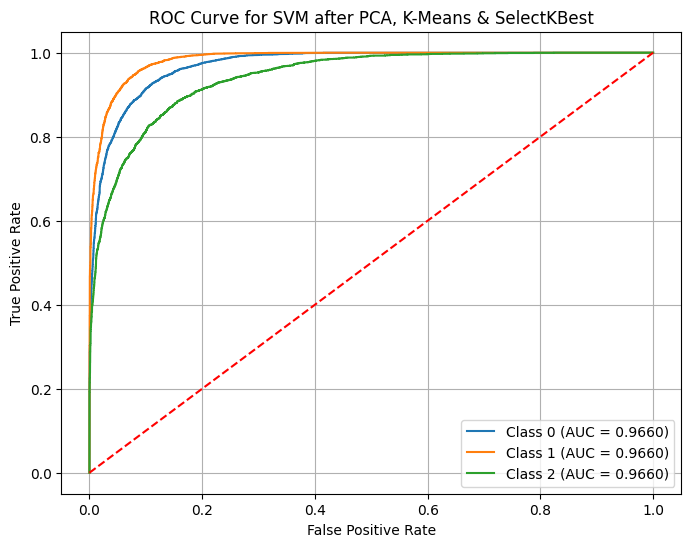

In [40]:
# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
g_mean = geometric_mean_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

# Print Metrics
print(f"SVM Accuracy after Feature Selection: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"G-Mean: {g_mean:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 8: Plot ROC Curve
fpr = {}
tpr = {}
for i in range(len(np.unique(y_test))):  # Multi-class ROC
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])

plt.figure(figsize=(8, 6))
for i in fpr:
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM after PCA, K-Means & SelectKBest")
plt.legend()
plt.grid()
plt.show()
